In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
db = pd.read_csv('london_merged.csv')

In [3]:
db.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
db = db.drop(columns=['timestamp'], axis=1)

In [6]:
db.nunique()

cnt             3781
t1                73
t2                82
hum              143
wind_speed       103
weather_code       7
is_holiday         2
is_weekend         2
season             4
dtype: int64

### Step 1

Distribution of continuous MRV

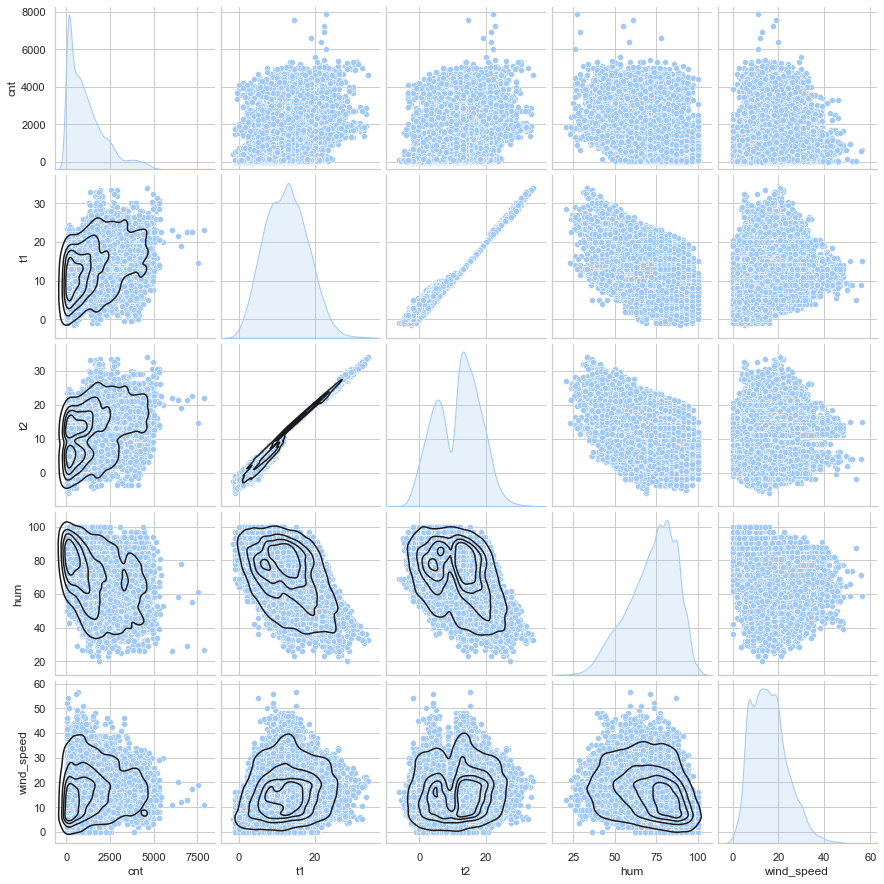

In [17]:
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot((db[db.loc[:,:'wind_speed'].columns]), diag_kind='kde')
ax.map_lower(sns.kdeplot, levels=5, color='.1')

plt.show()

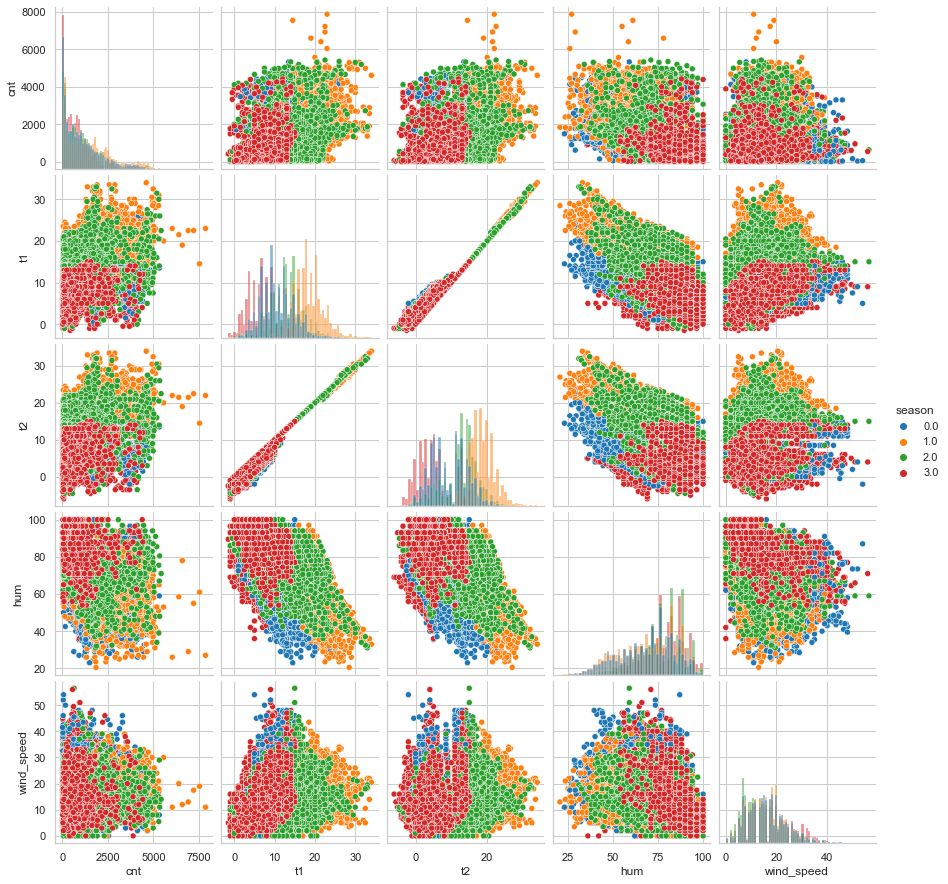

In [23]:
sns.pairplot(db, hue='season', vars=(db.loc[:,:'wind_speed'].columns), diag_kind="hist", palette="tab10")

We can see division by class of seasonality

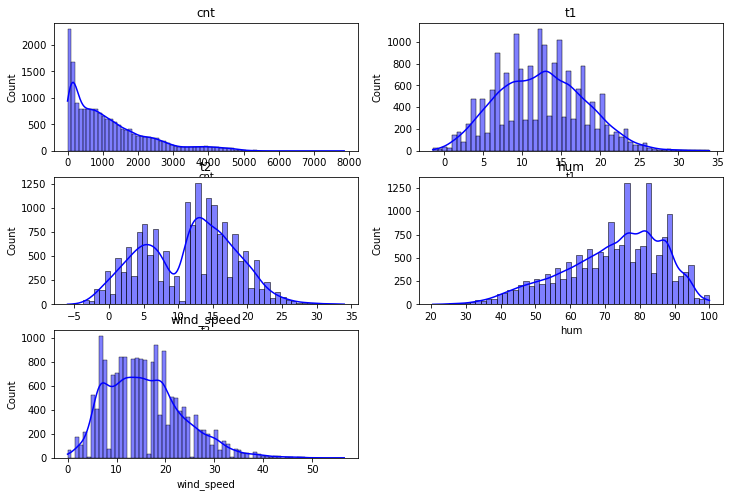

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(db.loc[:,:'wind_speed'].columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(db[col],kde=True,color='b')
    plt.title(col);

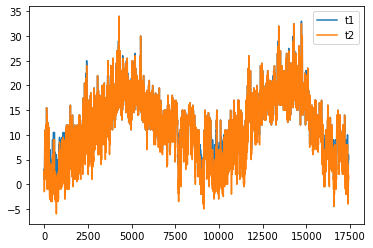

In [8]:
db[["t1", "t2"]].plot();

We can see those two features are highly connected

C:\Users\1vany\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


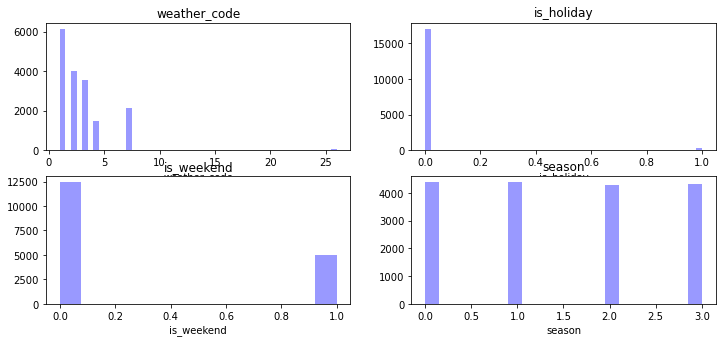

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(db.loc[:,'weather_code':].columns):
    plt.subplot(3, 2, i + 1)
    sns.distplot(db[col], kde=False, color='blue')
    plt.title(col);

In [10]:
for i in db.loc[:,'weather_code':].columns:
    print(f'Probability law of {i} \n')
    print(pd.Series([x/db.shape[0] for x in db[i].value_counts()]))

Probability law of weather_code 

0    0.353164
1    0.231653
2    0.203916
3    0.122947
4    0.084070
5    0.003446
6    0.000804
dtype: float64
Probability law of is_holiday 

0    0.977949
1    0.022051
dtype: float64
Probability law of is_weekend 

0    0.714597
1    0.285403
dtype: float64
Probability law of season 

0    0.252326
1    0.251924
2    0.248651
3    0.247100
dtype: float64


### Step 2

Mathematical expectation of each column

In [290]:
db.apply(np.mean)

cnt             1143.101642
t1                12.468091
t2                11.520836
hum               72.324954
wind_speed        15.913063
weather_code       2.722752
is_holiday         0.022051
is_weekend         0.285403
season             1.492075
dtype: float64

Variance for each column

In [291]:
db.apply(np.var)

cnt             1.177392e+06
t1              3.104337e+01
t2              4.375763e+01
hum             2.048555e+02
wind_speed      6.232066e+01
weather_code    5.480731e+00
is_holiday      2.156497e-02
is_weekend      2.039479e-01
season          1.251890e+00
dtype: float64

### Step 3

Extract data with count > median value

In [292]:
maj_db = db[db['cnt'] > db['cnt'].median()]

In [293]:
maj_db.loc[:, "t1":].apply(np.mean)

t1              14.479124
t2              13.799567
hum             65.183004
wind_speed      17.175381
weather_code     2.365088
is_holiday       0.014365
is_weekend       0.233624
season           1.390025
dtype: float64

In [294]:
maj_db.loc[:, "t1":].apply(np.var)

t1               31.802151
t2               42.713584
hum             215.101967
wind_speed       57.292063
weather_code      2.708931
is_holiday        0.014158
is_weekend        0.179044
season            1.117703
dtype: float64

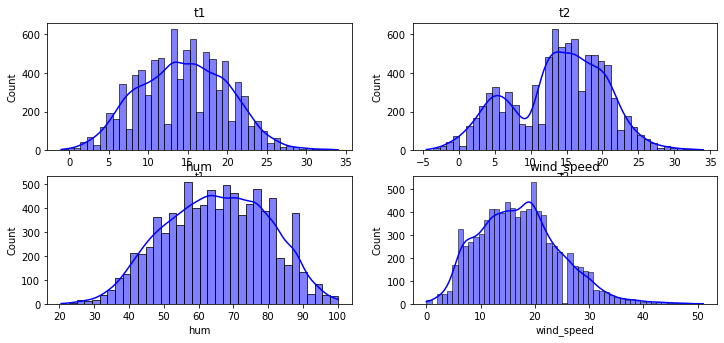

In [295]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(maj_db.loc[:, "t1":'wind_speed'].columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(maj_db[col],kde=True,color='b')
    plt.title(col);

In [24]:
min_db = db[db['cnt'] < db['cnt'].median()]

In [25]:
min_db.loc[:, "t1":].apply(np.mean)

t1              10.458118
t2               9.243249
hum             79.466132
wind_speed      14.649192
weather_code     3.081351
is_holiday       0.029760
is_weekend       0.337240
season           1.594163
dtype: float64

In [26]:
min_db.loc[:, "t1":].apply(np.var)

t1              22.205962
t2              34.428880
hum             92.708845
wind_speed      64.152347
weather_code     7.999587
is_holiday       0.028874
is_weekend       0.223509
season           1.364884
dtype: float64

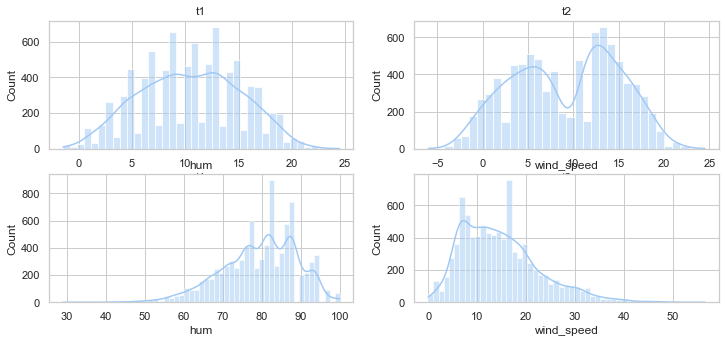

In [27]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(min_db.loc[:, "t1":'wind_speed'].columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(min_db[col],kde=True,color='b')
    plt.title(col);

The most difference we can see in the distribution of humidity

### Step 4

In [33]:
from dython.nominal import associations

C:\Users\1vany\AppData\Roaming\Python\Python38\site-packages\pkg_resources\__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


Correlation for continous variables

<AxesSubplot:>

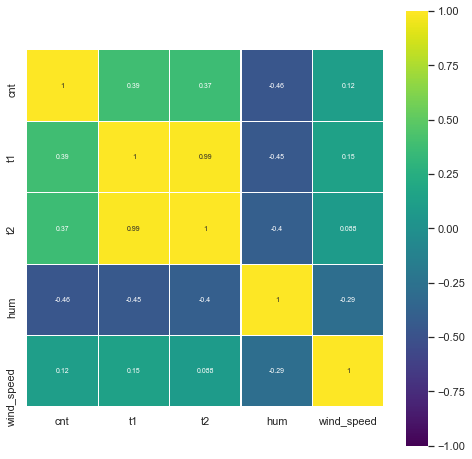

In [37]:
plt.figure(figsize=(8, 8))
corrmat = db.loc[:, :'wind_speed'].corr()
sns.heatmap(corrmat, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

In [30]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

Significance levels for correlation matrix

In [40]:
pvals = calculate_pvalues(corrmat) 

In [41]:
pvals

,cnt,t1,t2,hum,wind_speed
cnt,0.0,0.279,0.3012,0.0782,0.8037
t1,0.279,0.0,0.0001,0.0865,0.8775
t2,0.3012,0.0001,0.0,0.1111,0.9491
hum,0.0782,0.0865,0.1111,0.0,0.3867
wind_speed,0.8037,0.8775,0.9491,0.3867,0.0


In [60]:
for i in pvals.columns:
    res = stats.pearsonr(pvals['cnt'].values, pvals[i].values)
    print(f'p-value for column {i} and target confidence interval: {res}')

p-value for column cnt and target confidence interval: (1.0, 0.0)
p-value for column t1 and target confidence interval: (0.7521589580254752, 0.1424787777843376)
p-value for column t2 and target confidence interval: (0.7484694562900974, 0.14558427734870452)
p-value for column hum and target confidence interval: (0.9407396455789503, 0.017162543311402368)
p-value for column wind_speed and target confidence interval: (-0.6377146821399376, 0.24704311836699264)


### Step 5

Target feature is a count of bikes, correlation with predictors calculated in previous step

### Step 6

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [93]:
# one-hot encoding
def dummies(col,train):
    train_dum = pd.get_dummies(train[col], prefix=col)
    train = pd.concat([train, train_dum], axis=1)
    train.drop(col,axis=1,inplace=True)
    return train

In [64]:
db.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [94]:
db_fixed = dummies('season', db)

In [95]:
db_fixed = dummies('is_weekend', db_fixed)

In [96]:
db_fixed = db_fixed.drop(['wind_speed'], axis=1)

In [97]:
db_fixed.head()

,cnt,t1,t2,hum,weather_code,is_holiday,season_0.0,season_1.0,season_2.0,season_3.0,is_weekend_0.0,is_weekend_1.0
0,182,3.0,2.0,93.0,3.0,0.0,0,0,0,1,0,1
1,138,3.0,2.5,93.0,1.0,0.0,0,0,0,1,0,1
2,134,2.5,2.5,96.5,1.0,0.0,0,0,0,1,0,1
3,72,2.0,2.0,100.0,1.0,0.0,0,0,0,1,0,1
4,47,2.0,0.0,93.0,1.0,0.0,0,0,0,1,0,1


In [98]:
X_train, X_val, y_train, y_val = train_test_split(db_fixed.drop('cnt', axis=1), db['cnt'], random_state=17)

In [99]:
linreg = LinearRegression(normalize=True)

In [100]:
linreg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [101]:
params = linreg.coef_

In [152]:
def coefs(coefs, feature_names=db_fixed.drop('cnt', axis=1).columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)

In [153]:
coefs(linreg.coef_)

,coef
season_2.0,110.448726
is_weekend_0.0,107.206706
season_3.0,83.571692
t1,77.537571
weather_code,-12.947910
t2,-21.004253
hum,-26.920580
season_0.0,-46.720491
is_weekend_1.0,-107.206706
season_1.0,-146.926364


In [103]:
y_pred = linreg.predict(X_val)

In [104]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  679.0861969243584
Mean squared error =  840803.3291567238


Lasso regression

In [106]:
clf = Lasso(alpha=0.1, normalize=True)
clf.fit(X_train, y_train)

Lasso(alpha=0.1, normalize=True)

In [154]:
coefs(clf.coef_)

,coef
is_weekend_0.0,186.480363
season_2.0,58.936155
t1,45.838389
t2,0.000000
season_3.0,0.000000
is_weekend_1.0,-0.000000
weather_code,-7.153745
hum,-27.223535
season_0.0,-74.340128
season_1.0,-113.574974


Highly correlated variables are equal zero

In [108]:
mae_lasso = mean_absolute_error(y_val, clf.predict(X_val))
mse_lasso = mean_squared_error(y_val, clf.predict(X_val))
print('Mean absolute error = ', mae_lasso)
print('Mean squared error = ', mse_lasso)

Mean absolute error =  679.7575287034938
Mean squared error =  843113.5075969371


Tune lasso model

In [112]:
alphas = np.logspace(-4, 4, 100)
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)
lasso.alpha_

0.0001

In [113]:
mae_lasso = mean_absolute_error(y_val, lasso.predict(X_val))
mse_lasso = mean_squared_error(y_val, lasso.predict(X_val))
print('Mean absolute error = ', mae_lasso)
print('Mean squared error = ', mse_lasso)

Mean absolute error =  679.083132044269
Mean squared error =  840804.614426389


In [155]:
coefs(lasso.coef_)

,coef
is_weekend_0.0,2.143771e+02
t1,7.732403e+01
season_2.0,5.636034e+01
season_3.0,2.950522e+01
is_weekend_1.0,-5.712483e-12
weather_code,-1.293469e+01
t2,-2.083276e+01
hum,-2.692491e+01
season_0.0,-1.007791e+02
season_1.0,-2.008674e+02


### Step 7

C:\Users\1vany\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

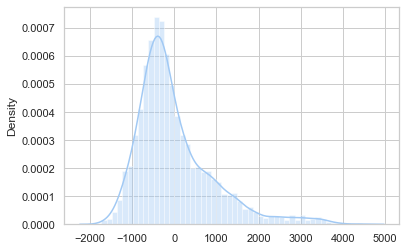

In [123]:
# Plotting the distribution of residuals
y1 = np.array(y_val)
y2 = np.array(lasso.predict(X_val))
y_diff = y1[:] - y2[:]
sns.distplot(y_diff, kde=True)

In [147]:
def return_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = stats.kstest(array, cdf=cdf, args=args).pvalue
    sstest = stats.shapiro(array).pvalue
    
    print('Shapiro-Wilk Test: {}'.format(sstest))
    print('Kolmogorov-Smirnov Test: {}'.format(kstest))

In [148]:
return_test(y_diff, distribution=stats.norm, cdf='norm')

Shapiro-Wilk Test: 0.0
Kolmogorov-Smirnov Test: 1.1347064723360283e-66


In [137]:
def return_biplot(array, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    args = distribution.fit(array)
    stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

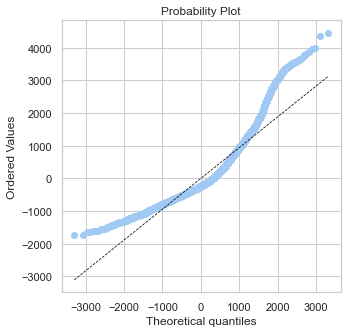

In [138]:
return_biplot(y_diff, distribution=stats.norm)

In [122]:
#Confidence interval of regression coef 
import numpy as np, statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))  


                          0            1
t1                49.991645   105.083497
t2               -43.271813     1.263307
hum              -28.848579   -24.992581
weather_code     -22.736312    -3.159507
is_holiday      -428.545015  -139.961533
season_0.0       672.080425   807.614379
season_1.0       540.262352   739.020706
season_2.0       812.956556   981.076683
season_3.0       794.661519   945.617650
is_weekend_0.0  1539.762124  1821.296424
is_weekend_1.0  1321.617599  1610.614124
